### case study: Covid 19 data analysis

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import the dataset.
dataset = pd.read_csv("D:/GAURAV NOTES/notes 1965/python programming/data+science/data science/drive-download-20211129T055036Z-001 (1)/covid19_Confirmed_dataset.csv")
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
dataset.shape

(266, 104)

In [4]:
# delete the useless columns.
df = dataset.drop(["Lat","Long"], axis=1, inplace = True)


In [5]:
dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [6]:
# aggregate the rows by the country. 
corona_dataset_aggregate = dataset.groupby("Country/Region").sum ()

C:\Users\gaura\AppData\Local\Temp\ipykernel_5592\2835571634.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corona_dataset_aggregate = dataset.groupby("Country/Region").sum ()


In [7]:
corona_dataset_aggregate.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
corona_dataset_aggregate.shape

(187, 100)

<Axes: >

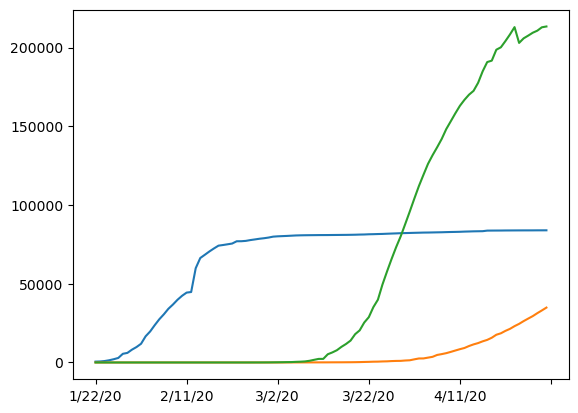

In [9]:
# visualize the data related to the country.
corona_dataset_aggregate.loc["China"].plot()
corona_dataset_aggregate.loc["India"].plot()
corona_dataset_aggregate.loc["Spain"].plot()

<Axes: >

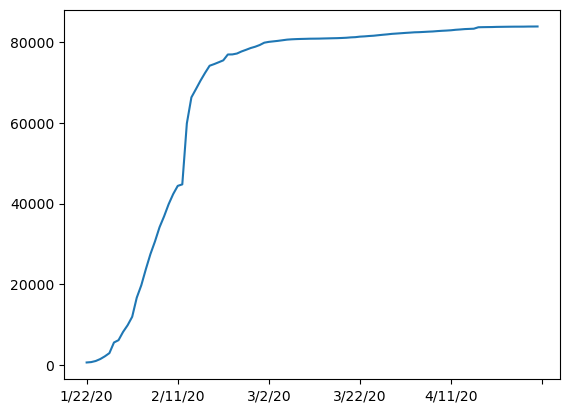

In [10]:
# calculate the good measure.

corona_dataset_aggregate.loc["China"].plot()

<Axes: >

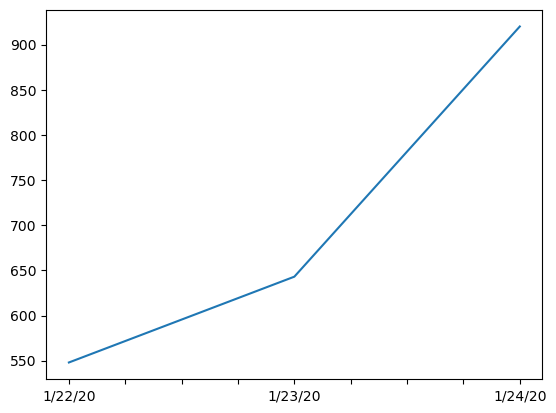

In [11]:

corona_dataset_aggregate.loc["China"][:3].plot()

<Axes: >

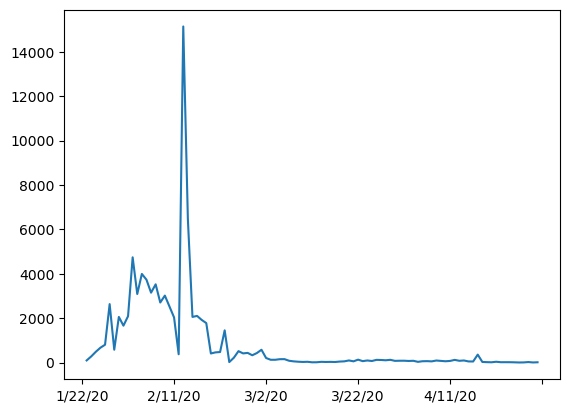

In [12]:
corona_dataset_aggregate.loc["China"].diff().plot()

In [13]:
# maximum infection rate. 
corona_dataset_aggregate.loc["China"].max()

83956

In [14]:
corona_dataset_aggregate.loc["India"].max()

34863

In [15]:
corona_dataset_aggregate.loc["Spain"].max()

213435

In [16]:
countries = list(corona_dataset_aggregate.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(corona_dataset_aggregate.loc[c].diff().max())
corona_dataset_aggregate['Max_Infection_rates'] = max_infection_rates

In [17]:
corona_dataset_aggregate

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_Infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [18]:
# create a new dataframe.
corona_data = pd.DataFrame(corona_dataset_aggregate["Max_Infection_rates"])

In [19]:
corona_data

,Max_Infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [20]:
# importing the happiness dataset. 
happiness_report = pd.read_csv("D:/GAURAV NOTES/notes 1965/python programming/data+science/data science/drive-download-20211129T055036Z-001 (1)/worldwide_happiness_report.csv")


In [21]:
happiness_report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [22]:
# drop the useless columns. 
useless_cols = [" Overall rank", "Generosity", " Perceptions of corruption"]

In [ ]:
happiness_report.drop(useless_cols, axis=1, inplace=True)
happiness_report.head()

In [24]:
happiness_report.set_index("Country or region", inplace=True)
happiness_report.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [25]:
corona_data.shape

(187, 1)

In [26]:
happiness_report.shape

(156, 8)

In [27]:
data = corona_data.join(happiness_report, how='inner')
data

,Max_Infection_rates,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Afghanistan,232.0,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
Albania,34.0,107,4.719,0.947,0.848,0.874,0.383,0.178,0.027
Algeria,199.0,88,5.211,1.002,1.160,0.785,0.086,0.073,0.114
Argentina,291.0,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050
Armenia,134.0,116,4.559,0.850,1.055,0.815,0.283,0.095,0.064
...,...,...,...,...,...,...,...,...,...
Venezuela,29.0,108,4.707,0.960,1.427,0.805,0.154,0.064,0.047
Vietnam,19.0,94,5.175,0.741,1.346,0.851,0.543,0.147,0.073
Yemen,5.0,151,3.380,0.287,1.163,0.463,0.143,0.108,0.077
Zambia,9.0,138,4.107,0.578,1.058,0.426,0.431,0.247,0.087


In [28]:
data.corr()

,Max_Infection_rates,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Max_Infection_rates,1.000000,-0.244777,0.228783,0.250118,0.191958,0.289263,0.078196,-0.114635,0.097703
Overall rank,-0.244777,1.000000,-0.988972,-0.802204,-0.780955,-0.804753,-0.570490,-0.063107,-0.389360
Score,0.228783,-0.988972,1.000000,0.793847,0.788591,0.799893,0.587007,0.090420,0.420437
GDP per capita,0.250118,-0.802204,0.793847,1.000000,0.759468,0.863062,0.394603,-0.103870,0.311577
Social support,0.191958,-0.780955,0.788591,0.759468,1.000000,0.765286,0.456246,-0.061361,0.203225
Healthy life expectancy,0.289263,-0.804753,0.799893,0.863062,0.765286,1.000000,0.427892,-0.068387,0.314811
Freedom to make life choices,0.078196,-0.570490,0.587007,0.394603,0.456246,0.427892,1.000000,0.258539,0.446677
Generosity,-0.114635,-0.063107,0.090420,-0.103870,-0.061361,-0.068387,0.258539,1.000000,0.326166
Perceptions of corruption,0.097703,-0.389360,0.420437,0.311577,0.203225,0.314811,0.446677,0.326166,1.000000


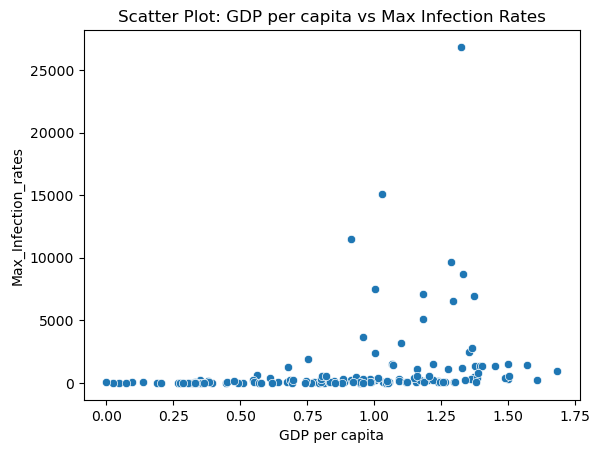

In [29]:
# visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
x = data["GDP per capita"]
y = data["Max_Infection_rates"]

# Scatter plot using seaborn
sns.scatterplot(x=x, y=y)
plt.title("Scatter Plot: GDP per capita vs Max Infection Rates")
plt.show()


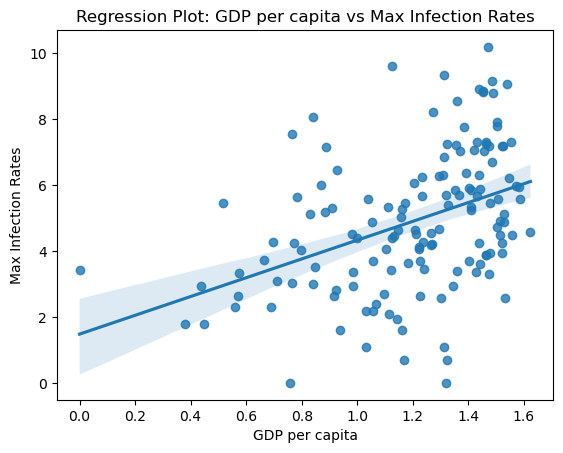

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
x = data["Social support"]
y = data["Max_Infection_rates"]

# Regression plot using seaborn
sns.regplot(x=x, y=np.log(y))
plt.title("Regression Plot: GDP per capita vs Max Infection Rates")
plt.xlabel("GDP per capita")
plt.ylabel("Max Infection Rates")
plt.show()


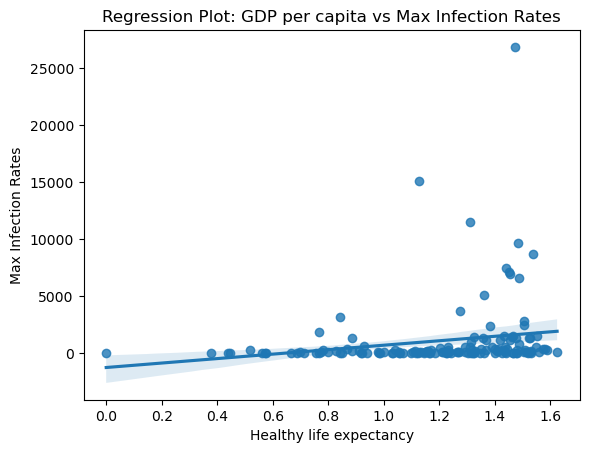

In [31]:
x = data["Social support"]
y = data["Max_Infection_rates"]

# Regression plot using seaborn
sns.regplot(x=x, y=y)
plt.title("Regression Plot: GDP per capita vs Max Infection Rates")
plt.xlabel("Healthy life expectancy")
plt.ylabel("Max Infection Rates")
plt.show()

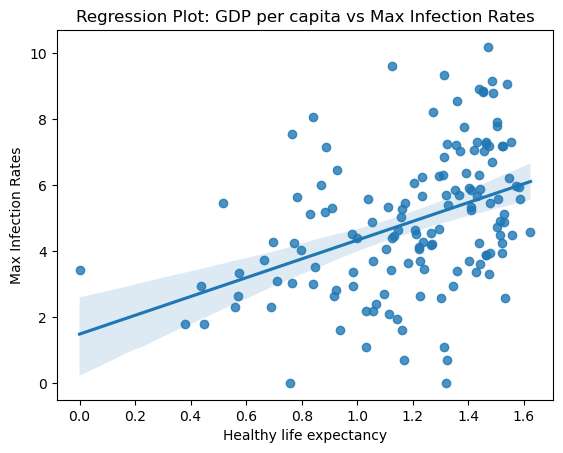

In [32]:
x = data["Social support"]
y = data["Max_Infection_rates"]

# Regression plot using seaborn
sns.regplot(x=x, y=np.log(y))
plt.title("Regression Plot: GDP per capita vs Max Infection Rates")
plt.xlabel("Healthy life expectancy")
plt.ylabel("Max Infection Rates")
plt.show()